In [1]:
import pandas as pd
import numpy as np
import os
from fancyimpute import KNN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

Using TensorFlow backend.


In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [3]:
#Adjusting columns
print(train_data.columns)
train_data['data']='train'
test_data['Loan_Status']='N'
test_data['data']='test'

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [4]:
merged_data=pd.concat([train_data,test_data])

In [7]:
merged_data.shape

(981, 14)

In [5]:
missing_values=((merged_data.isnull().sum()/len(merged_data))*100)

In [6]:
missing_values

Loan_ID              0.000000
Gender               2.446483
Married              0.305810
Dependents           2.548420
Education            0.000000
Self_Employed        5.606524
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           2.752294
Loan_Amount_Term     2.038736
Credit_History       8.053007
Property_Area        0.000000
Loan_Status          0.000000
data                 0.000000
dtype: float64

In [8]:
merged_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,train
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,train
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,train
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,train
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,train


In [11]:
len(merged_data['Loan_ID'].unique())

981

In [15]:
merged_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


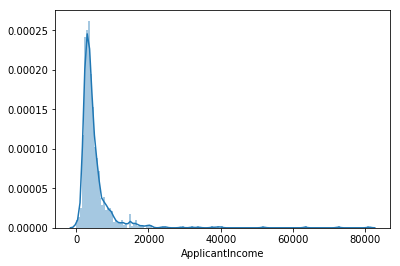

In [14]:
sns.distplot(merged_data['ApplicantIncome'],bins=150)

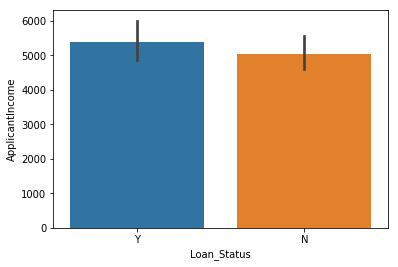

In [17]:
sns.barplot(merged_data['Loan_Status'],merged_data['ApplicantIncome'])

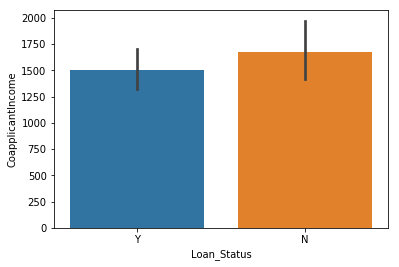

In [18]:
sns.barplot(merged_data['Loan_Status'],merged_data['CoapplicantIncome'])

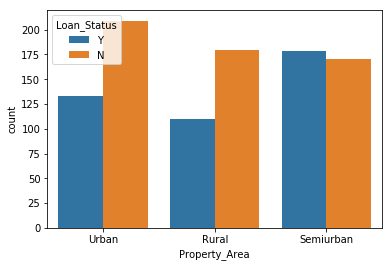

In [23]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=merged_data)

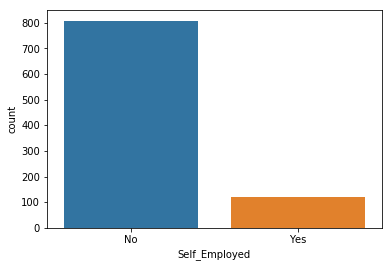

In [24]:
sns.countplot(merged_data['Self_Employed'])

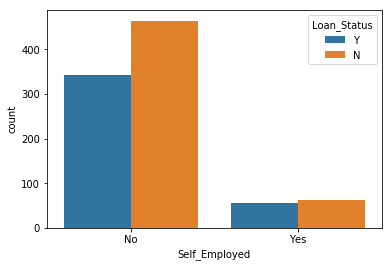

In [25]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=merged_data)

In [26]:
merged_data['Credit_History']=merged_data['Credit_History'].astype(str)

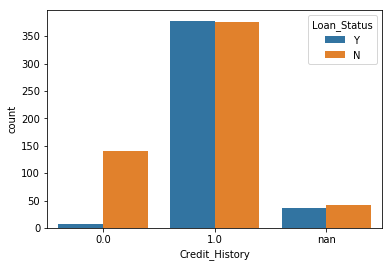

In [27]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=merged_data)

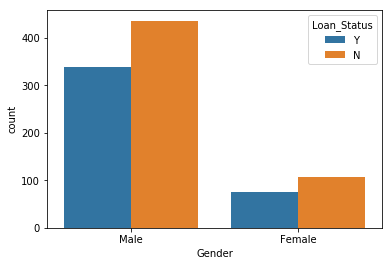

In [28]:
sns.countplot(x='Gender',hue='Loan_Status',data=merged_data)

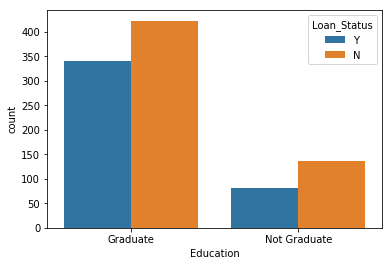

In [29]:
sns.countplot(x='Education',hue='Loan_Status',data=merged_data)

<BarContainer object of 2 artists>

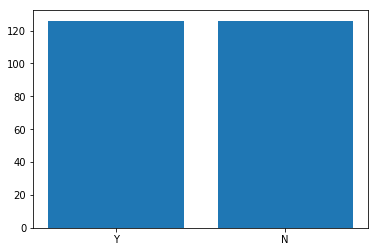

In [35]:
plt.bar(x=merged_data['Loan_Status'].unique(),height=merged_data['LoanAmount'].median())

<BarContainer object of 2 artists>

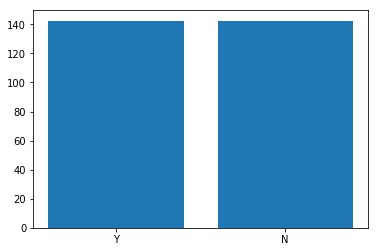

In [36]:
plt.bar(x=merged_data['Loan_Status'].unique(),height=merged_data['LoanAmount'].mean())

<BarContainer object of 3 artists>

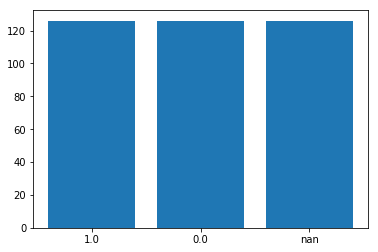

In [38]:
plt.bar(x=merged_data['Credit_History'].unique(),height=merged_data['LoanAmount'].median())